In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import pandas as pd

In [3]:
sa = pd.read_csv('../exp/SA/SA_sp500_2021-Sep-21-19-02-32/future_performance.csv')
rps = pd.read_csv('../exp/RPS/RPS_sp500_2021-Sep-21-13-49-00/future_performances.csv')
rnd = pd.read_csv('../exp/Random/Random_sp500_2021-Sep-21-19-33-13/future_performances.csv')
mtg = pd.read_csv('../exp/Mantegna/Mantegna_sp500_2021-Sep-21-13-45-34/future_performances.csv')

In [4]:
sa['method'] = 'SA'
rps['method'] = 'RPS'
rnd['method'] = 'RND'
mtg['method'] = 'MTG'

In [5]:
merged = rps.append(mtg).append(sa).append(rnd).reset_index(drop=True)

In [25]:
merged[merged['return'] != 0].groupby('method').apply(lambda g: g['return'].mean())

method
MTG    0.438157
RND    0.438157
RPS    0.420168
SA     0.466278
dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

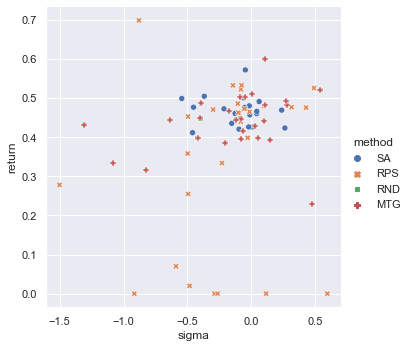

In [8]:
sns.relplot(
    data=merged.sort_values('method', ascending=False),
    x='sigma', y='return', hue='method', style='method',
)

In [21]:
merged[merged['return'] == 0]

,stocks,weights,corr_min,corr_max,corr_mean,corr_std,return,sigma,sharpe,information,modigliani,method
1,BHF//O,0.2195418568343619//0.7804581431656381,"[0.2195418568343619, 0.7804581431656381]",0.194589,0.194589,0.194589,0.0,0.595137,0.171413,3.420034,2.531836,RPS
7,MAR//WYNN,0.8302194154859172//0.16978058451408284,"[0.8302194154859172, 0.16978058451408284]",0.728157,0.728157,0.728157,0.0,-0.915280,0.305984,-3.020350,-3.884896,RPS
14,KIM//SLG,0.6618972370535956//0.3381027629464044,"[0.6618972370535956, 0.3381027629464044]",0.128735,0.128735,0.128735,0.0,-0.264128,0.182565,-1.495511,-1.118597,RPS
24,CAG//WAT,0.7257474711589507//0.27425252884104934,"[0.7257474711589507, 0.27425252884104934]",0.071136,0.071136,0.071136,0.0,0.116027,0.281148,0.381035,0.496424,RPS
27,HON//ZION,0.6082257864239156//0.39177421357608444,"[0.6082257864239156, 0.39177421357608444]",0.670624,0.670624,0.670624,0.0,-0.287342,0.283206,-1.046033,-1.217218,RPS


In [15]:
before_mtg = pd.read_csv('../exp/Mantegna/Mantegna_sp500_2021-Sep-21-13-38-58/mantegna_results.csv')
before_rps = pd.read_csv('../exp/RPS/RPS_sp500_2021-Sep-19-11-41-05/results.csv')

In [16]:
before_mtg['new_return'] = mtg['return']
before_mtg['new_sigma'] = mtg['sigma']
before_mtg['new_sharpe'] = mtg['sharpe']

In [17]:
before_rps['new_return'] = rps['return']
before_rps['new_sigma'] = rps['sigma']
before_rps['new_sharpe'] = rps['sharpe']

<AxesSubplot:xlabel='return', ylabel='new_return'>

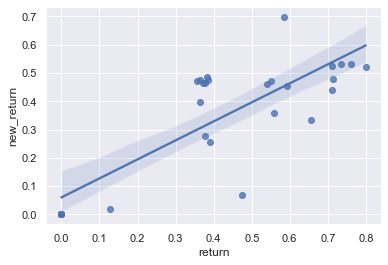

In [18]:
sns.regplot(data=before_rps, x="return", y="new_return")

<AxesSubplot:xlabel='return', ylabel='new_return'>

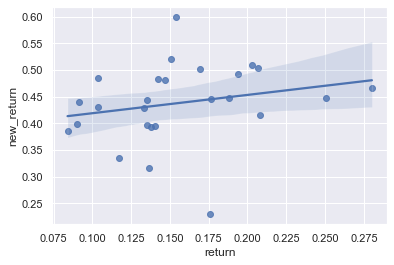

In [43]:
sns.regplot(data=before_mtg, x="return", y="new_return")

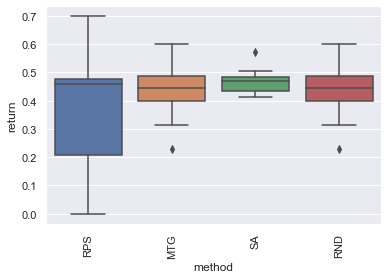

In [19]:
ax = sns.boxplot(x='method', y='return', data=merged)
r = plt.setp(ax.get_xticklabels(), rotation=90)